# Statystyczne metody przetwarzania danych 

## Laboratorium 4 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.

### Termin
Zadanie należy wykonać tego samego dnia. 

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab04.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość). Warstwa prezentacji danych to jeden z głównych elementów wpływających na ocenę.**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz minimum 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.


In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import operator
from random import randint

ATTRIBUTE_NAMES = ["Class", "Specimen No.", "Eccentricity", "Aspect Ratio", "Elongation", "Solidity", "Stochastic Convexity", "Isoperimetric Factor", "Maximal Indentation Depth", "Lobedness", "Average Intensity", "Average Contrast", "Smoothness", "Third moment", "Uniformity", "Entropy"]
CLASS_NAMES = \
"""Quercus suber 
Salix atrocinera 
Populus nigra 
Alnus sp. 
Quercus robur 
Crataegus monogyna 
Ilex aquifolium 
Nerium oleander 
Betula pubescens 
Tilia tomentosa 
Acer palmatum 
Celtis sp. 
Corylus avellana 
Castanea sativa 
Populus alba 
Acer negundo 
Taxus bacatta 
Papaver sp. 
Polypolium vulgare 
Pinus sp. 
Fraxinus sp. 
Primula vulgaris 
Erodium sp. 
Bougainvillea sp. 
Arisarum vulgare 
Euonymus japonicus 
Ilex perado ssp. azorica 
Magnolia soulangeana 
Buxus sempervirens 
Urtica dioica 
Podocarpus sp. 
Acca sellowiana 
Hydrangea sp. 
Pseudosasa japonica 
Magnolia grandiflora 
Geranium sp. 
Aesculus californica 
Chelidonium majus 
Schinus terebinthifolius 
Fragaria vesca """.split("\n")
# import data
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f, allow_pickle=True)
    train, test = data['train'], data['test']
print(train.shape) # verify shape

def normalize_array_columns(a, column_indices):
    for index in column_indices:
        a[:, index] = (a[:,index] - a[:,index].min()) / (a[:,index].max() - a[:,index].min())
    return a

train_normalized = normalize_array_columns(train.copy(), range(2,16))
test_normalized = normalize_array_columns(test.copy(), range(2,16))
print(train_normalized[:,2:16].min(), train_normalized[:,2:16].max())
print(test_normalized[:,2:16].min(), train_normalized[:,2:16].max())
     
CLASS_COUNT = 40

classIndexes = []
for i in range(CLASS_COUNT):
    classIndexes.append([])
for i, sample in enumerate(train):
    classIndexes[int(sample[0])-1].append(int(i))
"""
for i, sampleClass in enumerate(classIndexes):
    print(i,len(sampleClass))
"""
classIndexesTest = []
for i in range(CLASS_COUNT):
    classIndexesTest.append([])
for i, sample in enumerate(test):
    classIndexesTest[int(sample[0])-1].append(int(i))

 
classMeans = [train[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]
classMeansNormalized = [train_normalized[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]
print(classMeans[0])


(2244, 16)
0.0 1.0
0.0 1.0
[1.00000000e+00 6.42857143e+00 8.04829893e-01 1.70366987e+00
 4.25848188e-01 9.73543273e-01 9.93903017e-01 7.73864549e-01
 5.79951347e-03 3.87482009e-03 2.03802164e-02 7.15419902e-02
 6.15755177e-03 1.86811787e-03 1.02716254e-04 5.83331644e-01]


<ipython-input-1-9fe488ef178e>:83: RuntimeWarning: Mean of empty slice.
  classMeans = [train[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-1-9fe488ef178e>:84: RuntimeWarning: Mean of empty slice.
  classMeansNormalized = [train_normalized[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]


In [2]:
def assign_nm_machalan(test_sample, class_means, class_indices, attribute_indices, class_cov_matrices):
    diff_vect = np.array(test_sample[attribute_indices]-class_means[class_indices][0][attribute_indices])
    comat = np.linalg.inv(class_cov_matrices[class_indices[0]])
    min_dist = np.sqrt(np.matmul(np.matmul(diff_vect,comat),diff_vect))
    min_class = 0
    for i, m in enumerate(class_means[class_indices]):
        diff_vect = np.array(test_sample[attribute_indices]-class_means[class_indices][i][attribute_indices])
        comat = np.linalg.inv(class_cov_matrices[class_indices[i]])
        d = np.sqrt(np.matmul(np.matmul(diff_vect,comat),diff_vect))
        if(d < min_dist):
            min_dist = d
            min_class = i
    return class_indices[min_class];
        

def covariance_matrix(samples, rowvar=False):
    var_axis = 0 if rowvar else 1
    samp_axis = 1 if rowvar else 0
    mean = samples.mean(axis=samp_axis)
    result = np.zeros((samples.shape[var_axis], samples.shape[var_axis]))
    if(rowvar):
        for sample in samples.T:
            p = np.outer((sample - mean), (sample - mean))
            result += p
    else:
        for sample in samples:
            p = np.outer((sample - mean), (sample - mean))
            result += p
    result /= samples.shape[samp_axis]-1
    return result
    
def run_nm_test(train_array, test_array, class_means, classes, attributes):
    chosen_train_samples = np.concatenate(
        [train_array[classIndexes[i],:] for i in classes],
        axis=0
    ) # pick train samples from chosen classes
    chosen_test_samples = np.concatenate(
        [test_array[classIndexesTest[i],:] for i in classes],
        axis=0
    ) # filter out test samples that do not belong to the chosen classes
    
    test_classes = [sample[0] for sample in chosen_test_samples] # pick indices of classes that are tested

    classCovMatrices = []
    for i in range(CLASS_COUNT):
        try:
            # calculate covariance matrix only for selected attributes
            classCovMatrices.append(covariance_matrix(train_array[classIndexes[i]][:,attributes]))
        except:
            classCovMatrices.append(None)
    test_nearest_means = \
        [
            1+int(assign_nm_machalan(test_sample, np.array(class_means), classes, attributes, classCovMatrices)) # pick only these means that are from the chosen classes(cast to np.array to be able to slice it with a list)    
            for test_sample in chosen_test_samples # for each test sample from the chosen ones (i.e. belonging to the chosen classes)
        ]
    
    totalTestSamples = chosen_test_samples.shape[0]
    correctSamples = 0
    for i, sample in enumerate(chosen_test_samples):
        if(test_nearest_means[i] == sample[0]): correctSamples+=1

    return {
        "total_samples": totalTestSamples,
        "correct_samples": correctSamples,
        "confusion_matrix": confusion_matrix(test_classes, test_nearest_means)
    }

def print_test_result(r:dict, matrix_class_indexes=None):
    """ Prints formatted result dict of run_knn_test()
    """
    print("MN: {} correct out of {} total. Accuracy: {:.2f}%".format(r['correct_samples'], r['total_samples'], r['correct_samples']/r['total_samples']*100))
    if(matrix_class_indexes):
        print("{:8.8s}".format("TRU\PRED"),end='|')
        for index in matrix_class_indexes: #print top row
            print("{:.8s}".format(CLASS_NAMES[index]),end='|')
        print()
        for i, row in enumerate(r["confusion_matrix"]): #print rows
            print("{:.8s}".format(CLASS_NAMES[i]),end='|')
            for col in row:
                print("{:8d}".format(int(col)),end='|')
            print()

In [3]:
print("\n5 CLASSES 10 ATTRIBUTES")
PARAM_CLASSES = [0,2,30,31,32]
PARAM_ATTRIBUTES = [4,5,6,7,8,9,10,11,12,13,14,15] 
print("\nNORMALIZED")
print_test_result(run_nm_test(train_normalized, test_normalized, classMeansNormalized, PARAM_CLASSES, PARAM_ATTRIBUTES), PARAM_CLASSES)

print("\nUNNORMALIZED")
print_test_result(run_nm_test(train, test, classMeans, PARAM_CLASSES, PARAM_ATTRIBUTES), PARAM_CLASSES)

print("\n8 CLASSES 10 ATTRIBUTES")
PARAM_CLASSES = [0,2,23,24,25,30,31,32]
PARAM_ATTRIBUTES = [4,5,6,7,8,9,10,11,12,13,14,15] 
print("\nNORMALIZED")
print_test_result(run_nm_test(train_normalized, test_normalized, classMeansNormalized, PARAM_CLASSES, PARAM_ATTRIBUTES), PARAM_CLASSES)

print("\nUNNORMALIZED")
print_test_result(run_nm_test(train, test, classMeans, PARAM_CLASSES, PARAM_ATTRIBUTES), PARAM_CLASSES)




5 CLASSES 10 ATTRIBUTES

NORMALIZED
MN: 209 correct out of 264 total. Accuracy: 79.17%

<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(



TRU\PRED|Quercus |Populus |Podocarp|Acca sel|Hydrange|
Quercus |      52|       0|       0|       1|       2|
Salix at|       1|      45|       0|       0|       9|
Populus |       0|       0|      44|       0|       0|
Alnus sp|      13|       0|       0|      13|      29|
Quercus |       0|       0|       0|       0|      55|

UNNORMALIZED
MN: 218 correct out of 264 total. Accuracy: 82.58%
TRU\PRED|Quercus |Populus |Podocarp|Acca sel|Hydrange|
Quercus |      55|       0|       0|       0|       0|
Salix at|       1|      39|       0|       0|      15|
Populus |       0|       0|      44|       0|       0|
Alnus sp|      16|       0|       0|      25|      14|
Quercus |       0|       0|       0|       0|      55|

8 CLASSES 10 ATTRIBUTES

NORMALIZED


<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


MN: 266 correct out of 396 total. Accuracy: 67.17%
TRU\PRED|Quercus |Populus |Bougainv|Arisarum|Euonymus|Podocarp|Acca sel|Hydrange|
Quercus |      19|       0|      25|       0|      11|       0|       0|       0|
Salix at|       0|      26|       4|       6|      19|       0|       0|       0|
Populus |       0|       0|      50|       0|       7|       0|       0|       9|
Alnus sp|       0|       0|       0|      33|       0|       0|       0|       0|
Quercus |       0|       0|       0|       0|      33|       0|       0|       0|
Crataegu|       0|       0|       0|       0|       0|      44|       0|       0|
Ilex aqu|       6|       0|       4|       0|      21|       0|      12|      12|
Nerium o|       0|       0|       0|       6|       0|       0|       0|      49|

UNNORMALIZED


<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


MN: 286 correct out of 396 total. Accuracy: 72.22%
TRU\PRED|Quercus |Populus |Bougainv|Arisarum|Euonymus|Podocarp|Acca sel|Hydrange|
Quercus |      27|       0|      13|       0|      15|       0|       0|       0|
Salix at|       0|      22|       0|       0|      32|       0|       0|       1|
Populus |       0|       0|      52|       0|       9|       0|       0|       5|
Alnus sp|       0|       0|       0|      33|       0|       0|       0|       0|
Quercus |       2|       0|       0|       0|      31|       0|       0|       0|
Crataegu|       0|       0|       0|       0|       0|      44|       0|       0|
Ilex aqu|      12|       0|       2|       0|       8|       0|      23|      10|
Nerium o|       0|       0|       0|       1|       0|       0|       0|      54|


#### Selekcja cech
* Przeprowadź selekcję cech za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera)
    * Wybierz 2-5 cech (ze zbioru 10 cech wybranych w poprzednim eksperymencie) i opisz dlaczego je wybrałeś.
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji:
    * dla 10 cech bez normalizacji,
    * dla 10 cech z normalizacją,
    * dla 2-5 cech bez normalizacji,
    * dla 2-5 cech z normalizacją.
* Opisz wyniki i napisz wnioski.


In [8]:
PARAM_CLASSES = [0,2,30,31,32]
PARAM_ATTRIBUTES = [4,5,6,7,8,9,10,11,12,13,14,15]

def compute_1d_fisher(train_array, class_indices, class_means, attr_col, class_a, class_b):
    samples_a = train_array[class_indices[class_a], attr_col]
    samples_b = train_array[class_indices[class_b], attr_col]
    std_a = np.std(samples_a)
    std_b = np.std(samples_b)
    #print(samples_a, samples_b)
    
    mean_a = np.mean(samples_a)
    mean_b = np.mean(samples_b)
    #print(std_a, std_b, mean_a, mean_b)
    return np.abs(mean_a-mean_b)/(std_a+std_b)

class_pairs = []

for i in range(len(PARAM_CLASSES)):
    for j in range(i, len(PARAM_CLASSES)):
        class_pairs.append((PARAM_CLASSES[i], PARAM_CLASSES[j]))
        

fisher_results = []
for attribute in PARAM_ATTRIBUTES:
    average_fisher = 0
    for pair in class_pairs:
        #average_fisher += compute_1d_fisher(train_normalized, classIndexes, np.array(classMeansNormalized), attribute, pair[0], pair[1])
        average_fisher += compute_1d_fisher(train, classIndexes, np.array(classMeans), attribute, pair[0], pair[1])
    average_fisher /= len(class_pairs)
    fisher_results.append((attribute, average_fisher))
    
fisher_results.sort(reverse=True, key=lambda x:x[1])
good_attributes = [fisher_results[i][0] for i in range(5)]
print(good_attributes)

class_covariance_matrices = []
for i in range(CLASS_COUNT):
    class_covariance_matrices.append(covariance_matrix(train[classIndexes[i]][:,PARAM_ATTRIBUTES]))


print("\n5 CLASSES 5 ATTRIBUTES")
PARAM_CLASSES = [0,1,2,3,4]
PARAM_ATTRIBUTES = [4,5,6,7,8,9,10,11,12,13,14,15] 
print("\nNORMALIZED")
print_test_result(run_nm_test(train_normalized, test_normalized, classMeansNormalized, PARAM_CLASSES, good_attributes), PARAM_CLASSES)

print("\nUNNORMALIZED")
print_test_result(run_nm_test(train, test, classMeans, PARAM_CLASSES, good_attributes), PARAM_CLASSES)



[7, 4, 8, 13, 11]

5 CLASSES 5 ATTRIBUTES

NORMALIZED
MN: 181 correct out of 231 total. Accuracy: 78.35%
TRU\PRED|Quercus |Salix at|Populus |Alnus sp|Quercus |
Quercus |      33|       0|       0|      22|       0|
Salix at|      13|      29|       0|       2|       0|
Populus |       0|       1|      42|      12|       0|
Alnus sp|       0|       0|       0|      22|       0|
Quercus |       0|       0|       0|       0|      55|

UNNORMALIZED
MN: 197 correct out of 231 total. Accuracy: 85.28%
TRU\PRED|Quercus |Salix at|Populus |Alnus sp|Quercus |
Quercus |      46|       0|       0|       9|       0|
Salix at|      12|      32|       0|       0|       0|
Populus |       5|       1|      42|       7|       0|
Alnus sp|       0|       0|       0|      22|       0|
Quercus |       0|       0|       0|       0|      55|


<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-2-a1c2d97fafae>:19: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


| METHOD                                   | ACCURACY |
|------------------------------------------|----------|
| 5C/10A Normalized                        | 79.17%   |
| 5C/10A Unnormalized                      | 82.58%   |
| 5C/5*A Normalized, selected attributes   | 78.35%   |
| 5C/5*A Unnormalized, selected attributes | 85.28%   |

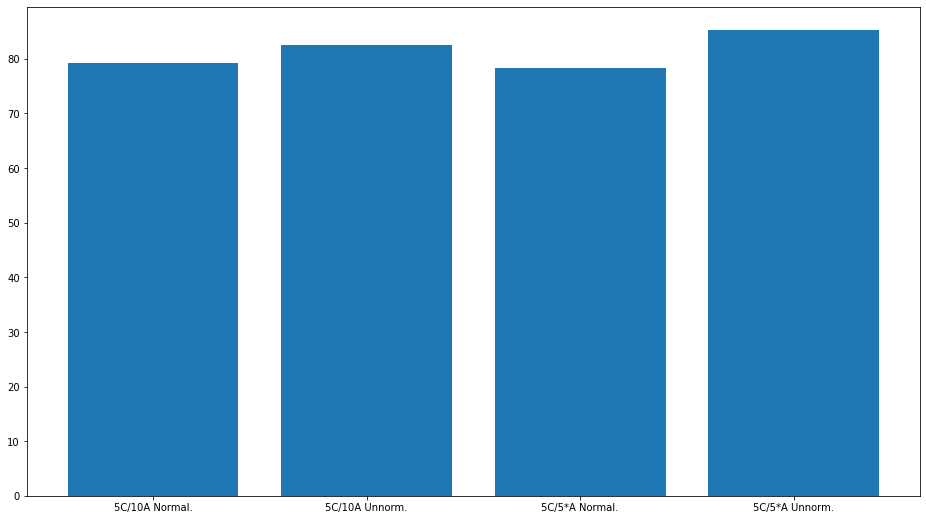

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(16,9))


labels = ['5C/10A Normal.', '5C/10A Unnorm.', '5C/5*A Normal.', '5C/5*A Unnorm.']
res = [79.17, 82.58, 78.35, 85.28]
ax.bar(labels,res)


plt.show()

Normalizacja próbek wpłynęła negatywnie na wyniki klasyfikacji. Wyniki celności dla znormalizowanych próbek są o kilka p.p. niższe niż tych nieznormalizowanych. Powodem tego stanu rzeczy jest najprawdopodobniej osiąganie wyższych wartości absolutnych przez zestaw kliku lub jednej szczególnie dyskryminatywnych cech. Poprzez znormalizowanie wartości przyjmowanych przez cech zlikwidowana zostaje nieświadomie przyznana tej grupie cech wyższa waga. 

Wiele z cech(np. Eccentricity, Isoperimetric Factor) przyjmuje wartości od 0 do 1 w wyniku operacji matematycznych użytych do ich wyznaczenia, co wyjaśnia w jakimś stopniu dlaczego klasyfikatory są w stanie osiągać tak wysokie wartości celności bez wykorzystania normalizacji, a potencjalnie dodatkowa normalizacja ma negatywny wpływ na rezultaty.

Do selekcji bardziej dyskryminatywnych cech klas zastosowano dość prostą metodę. Policzono jednowymiarowy współczynnik Fishera dla każdej z cech dla każdej pary wybranych klas i wybrano 5 cech z najwyższą wartością średnią dla par klas. Zastosowanie tej metody ograniczyło zestaw cech do 5: Isoperimietric Factor, Elongation, Maximal Indentation Depth, Third moment, Average Contrast.

Proces ten doprowadził do niewielkiego pogorszenia wyniku klasyfikacji dla znormalizowanych próbek i wzrostu celności o ok. 3 p.p. dla nieznormalizowanych, sugerując raczej niewielką użyteczność zaproponowanego wykorzystania współczynnika Fishera. Prawdopodobnie wykorzystanie wielowymiarowej wartości tego współczynnika dało by lepsze rezultaty.